In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
csv_data = pd.read_csv("Taipei MRT.csv",encoding='Big5',index_col = 0).T
csv_data

年別,99年進站,99年出站,100年進站,100年出站,101年進站,101年出站,102年進站,102年出站,103年進站,103年出站,...,106年進站,106年出站,107年進站,107年出站,108年進站,108年出站,109年進站,109年出站,110年進站,110年出站
松山機場,1106998,1021635,1553658,1490635,1716667,1588994,1836070,1726548,1957390,1857025,...,2060990,1977051,2075055,1991996,2134235,2044026,1444656,1446728,968525,969724
中山國中,5553606,5256239,5495671,5227422,5243484,5009954,5159971,4931507,5294712,5106823,...,5209076,5112034,5175220,5093383,5160937,5082422,4552397,4507674,3440683,3416599
南京復興BR,6762067,7385805,7219520,7900188,7156447,7868068,7091331,7834123,7037986,7691797,...,4742859,4919578,4827853,4990775,4930890,5085322,4353820,4483186,3212212,3262260
忠孝復興BR,2257854,2638537,2372833,2802386,2340511,2765380,2311510,2770261,2305546,2839790,...,2130670,2517200,2026566,2428719,2045650,2412453,1814979,2017550,1464580,1600872
大安BR,4578492,4842272,4959890,5199829,4964801,5145859,4798765,5021919,4652590,4820540,...,5277203,5263664,5472984,5417157,5506382,5450194,4905541,4837153,3651942,3622804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
蘆洲,656871,702963,2811639,2776553,3368959,3212283,3663291,3430350,3887218,3604237,...,4518285,4148350,4827068,4431264,5167189,4731585,4823791,4434231,3734786,3448897
三民高中,643791,651629,2975488,2961564,3429044,3388089,3717555,3674942,3952320,3928263,...,4308973,4354842,4322623,4370678,4329197,4401348,3937778,4008336,3096982,3166973
徐匯中學,542809,552916,2674996,2721758,3317904,3420010,3645423,3765027,3927330,4036679,...,4172205,4313766,4224150,4401302,4379442,4574981,4010349,4196567,3142951,3282973
三和國中,535044,521198,2841604,2758778,3292534,3134113,3532211,3349202,3813006,3614539,...,4267114,4053725,4373311,4162391,4518600,4315094,4147069,3967074,3251927,3137232


In [3]:
csv_data_std = (csv_data - csv_data.mean())/csv_data.std()

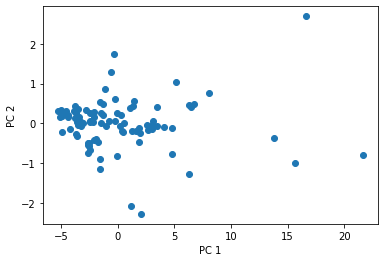

In [4]:
from sklearn.decomposition import PCA
pca1 = PCA()
X_train_pca = pca1.fit_transform(csv_data_std)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig('PCA.png',transparent = True)

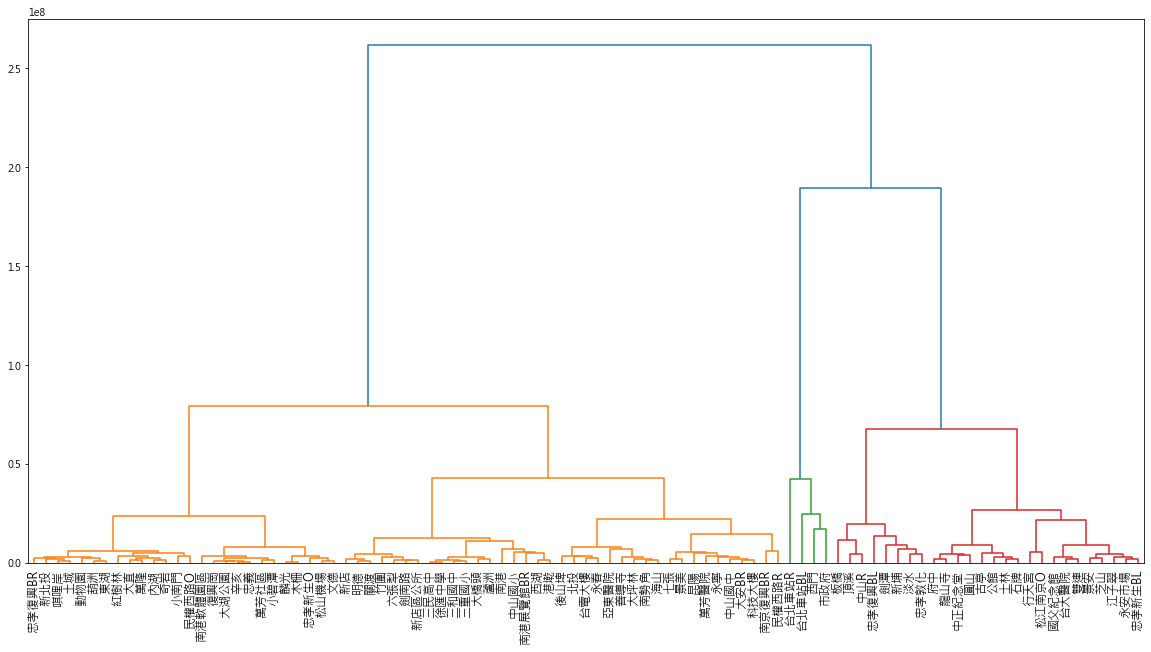

In [5]:
# create dendrogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,10))
dendrogram_csv = sch.dendrogram(sch.linkage(csv_data, method='ward'),labels=csv_data.index,leaf_font_size=12)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.savefig('dendrogram.png',transparent = True)

In [6]:
from sklearn.cluster import AgglomerativeClustering
ml=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [7]:
X = csv_data.iloc[:, :].values
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

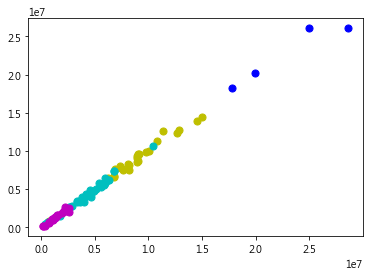

In [8]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='y')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='c')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='b')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='m')
plt.savefig('Visualisation.png',transparent = True)